In [3]:
import json 
import tensorflow as tf
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

In [4]:
from bs4 import BeautifulSoup as Bsoup
import string

# stop words that are going to to removed from the data during the preprocessing stage
stopwords = ["a", "about", "above", "after", "again", "against", "all", "am", "an", "and", "any", "are", "as", "at",
             "be", "because", "been", "before", "being", "below", "between", "both", "but", "by", "could", "did", "do",
             "does", "doing", "down", "during", "each", "few", "for", "from", "further", "had", "has", "have", "having",
             "he", "hed", "hes", "her", "here", "heres", "hers", "herself", "him", "himself", "his", "how",
             "hows", "i", "id", "ill", "im", "ive", "if", "in", "into", "is", "it", "its", "itself",
             "lets", "me", "more", "most", "my", "myself", "nor", "of", "on", "once", "only", "or", "other", "ought",
             "our", "ours", "ourselves", "out", "over", "own", "same", "she", "shed", "shell", "shes", "should",
             "so", "some", "such", "than", "that", "thats", "the", "their", "theirs", "them", "themselves", "then",
             "there", "theres", "these", "they", "theyd", "theyll", "theyre", "theyve", "this", "those", "through",
             "to", "too", "under", "until", "up", "very", "was", "we", "wed", "well", "were", "weve", "were",
             "what", "whats", "when", "whens", "where", "wheres", "which", "while", "who", "whos", "whom", "why",
             "whys", "with", "would", "you", "youd", "youll", "youre", "youve", "your", "yours", "yourself",
             "yourselves"]

# removes punctuation from the data that is used
table = str.maketrans('','',string.punctuation)

In [9]:
# loading the json sarcasm data
with open("/media/danlof/dan files/data_science_codes/project_3.2/sarcasm.json",'r') as f:
    datastore = json.load(f)# stores the json file as datastore

# intialization of different lists that are to be floaded with outputs later
sentences = []
labels = []
urls = []

for item in datastore:
    sentence = item['headline'].lower() # make the words lower case
    sentence = sentence.replace(",", " , ") # the following four cases of replace creates white spaces as indicated where indicated
    sentence = sentence.replace(".", " . ")
    sentence = sentence.replace("-", " - ")
    sentence = sentence.replace("/", " / ")
    # since our sentences have html tags , we remove them
    soup = Bsoup(sentence)
    sentence = soup.get_text()
    # now we split the sentences into words for removal of punctuations and stopwords 
    words = sentence.split()
    filtered_sentence = ""
    for word in words:
        word = word.translate(table)
        if word not in stopwords:
            filtered_sentence = filtered_sentence + word + ""
        # to the empty lists above we append different parts of the required outputs    
        sentences.append(filtered_sentence)
        labels.append(item['is_sarcastic'])
        urls.append(item['article_link'])



/tmp/ipykernel_5878/575818848.py:17: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = Bsoup(sentence)


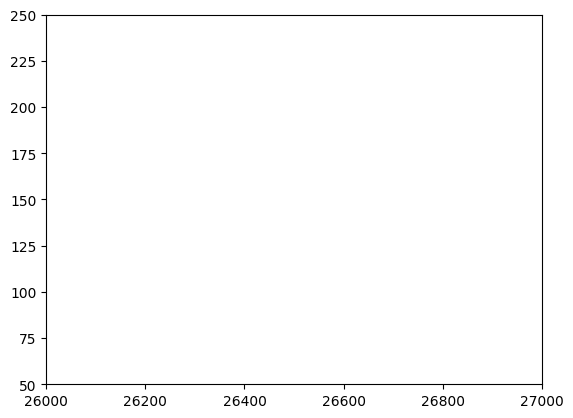

6


In [11]:
xs=[]
ys=[]

current_item=1
for item in sentences:
  xs.append(current_item)
  current_item=current_item+1
  ys.append(len(item))
newys = sorted(ys)

import matplotlib.pyplot as plt
plt.plot(xs,newys)
plt.axis([26000, 27000, 50, 250])
plt.show()

print(newys[26000])

In [12]:
vocab_size = 10000 
embedding_dim = 16
max_length = 100 # length of sentence
trunc_type = 'post'
padding_type = 'post'
oov_tok = ''
training_size = 23000

training_sentences = sentences[0:training_size]
testing_sentences = sentences[training_size:]
training_labels = labels[0:training_size]
testing_labels = labels[training_size:]


In [23]:
# we have initialized how our tokenizer on how it would perform on the data
tokenizer = Tokenizer(
    num_words=vocab_size,
    oov_token = oov_tok,      
                     )
tokenizer.fit_on_texts(training_sentences)# tokenizing the training instances
word_index = tokenizer.word_index # each word in the dictionary is represented with a unique integer

training_sequences = tokenizer.texts_to_sequences(training_sentences) # creates a sequence of numbers for easy training
training_padded = pad_sequences(training_sequences,maxlen=max_length, padding=padding_type, truncating=trunc_type) # padding is used to ensure all padding have the same length 

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length,  padding=padding_type, truncating=trunc_type)
     

wc = tokenizer.word_counts
wc

OrderedDict([('former', 1),
             ('formerversace', 1),
             ('formerversacestore', 1),
             ('formerversacestoreclerk', 1),
             ('formerversacestoreclerksues', 2),
             ('formerversacestoreclerksuessecret', 1),
             ('formerversacestoreclerksuessecretblack', 1),
             ('formerversacestoreclerksuessecretblackcode', 2),
             ('formerversacestoreclerksuessecretblackcodeminority', 1),
             ('formerversacestoreclerksuessecretblackcodeminorityshoppers', 1),
             ('roseanne', 1),
             ('roseannerevival', 1),
             ('roseannerevivalcatches', 4),
             ('roseannerevivalcatchesthorny', 1),
             ('roseannerevivalcatchesthornypolitical', 1),
             ('roseannerevivalcatchesthornypoliticalmood', 3),
             ('roseannerevivalcatchesthornypoliticalmoodbetter', 2),
             ('roseannerevivalcatchesthornypoliticalmoodbetterworse', 1),
             ('mom', 9),
             ('momsta

{'': 1, 'man': 2, 'new': 3, 'trump': 4, 'area': 5, 'us': 6, 'report': 7, 'u': 8, 'woman': 9, 'obama': 10, 'donaldtrump': 11, 'areaman': 12, '10': 13, 'study': 14, 'nation': 15, 'donald': 16, '5': 17, 'best': 18, 'hillaryclinton': 19, 'watch': 20, 'hillary': 21, '6': 22, '7': 23, 'parents': 24, 'pope': 25, 'white': 26, 'mom': 27, 'one': 28, 'areawoman': 29, 'everyone': 30, 'ex': 31, 'popefrancis': 32, 'texas': 33, 'gop': 34, 'will': 35, 'no': 36, 'police': 37, 'applefritterseason': 38, 'get': 39, 'north': 40, 'see': 41, '4': 42, 'look': 43, 'teacher': 44, 'god': 45, 'mannot': 46, 'nbc': 47, 'safeguarding': 48, 'bill': 49, 'whitehouse': 50, 'lookaskedshowusthankful': 51, 'national': 52, 'john': 53, 'clinton': 54, 'just': 55, '3': 56, 'isis': 57, 'isisvsisil': 58, 'trumps': 59, 'local': 60, 'video': 61, 'mike': 62, 'stomachsetsasidesyntheticadditives': 63, 'want': 64, 'power': 65, 'voters': 66, 'antarcticobservationalcomicrunning': 67, 'trump1polls': 68, '8': 69, 'studyfinds': 70, 'biden'

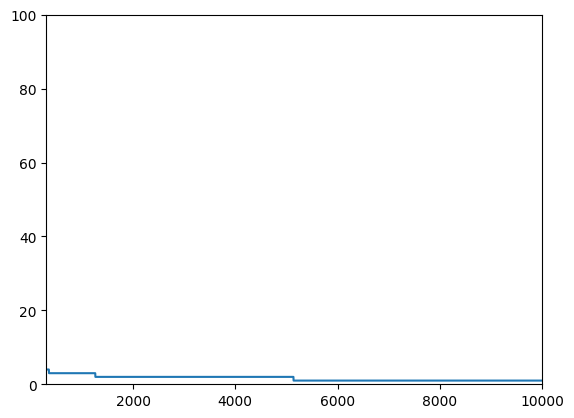

3
2001


In [24]:
from collections import OrderedDict
newlist = (OrderedDict(sorted(wc.items(),key = lambda t:t[1],reverse=True)))

print(word_index)
print(newlist)

xs = []
ys = []
curr_x = 1
for item in newlist:
    xs.append(curr_x)
    curr_x = curr_x + 1
    ys.append(newlist[item])

print(ys)
plt.plot(xs,ys)
plt.axis([300,10000,0,100])
plt.show()
print(ys[1000])
print(xs[2000])


In [25]:
print(ys[3125])
print(ys[10000])
print(ys[12156])

2
1
1


In [26]:
# now since we want to use tensorflow for training 
# we convert the labels and the data for training instance into numpy format

import numpy as np
training_padded = np.array(training_padded)
training_labels = np.array(training_labels)
testing_padded = np.array(testing_padded)
testing_padded = np.array(testing_labels)



In [28]:
# feeding the output of the embedding layer into a dense layer

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(10000,16),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

adam = tf.keras.optimizers.Adam(learning_rate=0.0001, beta_1=0.9, beta_2=0.999, amsgrad=False)
model.compile(loss='binary_crossentropy',optimizer=adam, metrics=['accuracy'])
     

In [29]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 16)          160000    
                                                                 
 global_average_pooling1d (  (None, 16)                0         
 GlobalAveragePooling1D)                                         
                                                                 
 dense (Dense)               (None, 24)                408       
                                                                 
 dense_1 (Dense)             (None, 1)                 25        
                                                                 
Total params: 160433 (626.69 KB)
Trainable params: 160433 (626.69 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
